# **What is a Notification Pop-up in a Web Browser?**

A notification pop-up in a web browser is a small message that appears when a website requests special permissions from the user. These pop-ups usually ask for things like:

Access to your location (as shown in your screenshot).

Permission to send notifications (e.g., news updates, messages).

Access to your camera or microphone (for video calls).

**Example of a Notification Pop-up**

**Scenario:**

You visit whatmylocation.com

The website wants to know your current location
A pop-up appears asking:

"whatmylocation.com wants to know your location."

✅ Allow → The website gets your location

❌ Block → The website won’t access your location

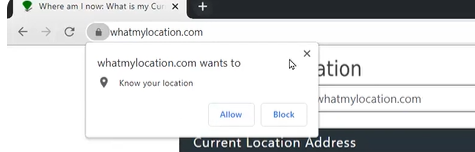



```
from selenium import webdriver  # Import Selenium WebDriver
from selenium.webdriver.chrome.service import Service  # Import Service to manage WebDriver
from selenium.webdriver.common.by import By  # Import By to locate elements
import time

# 1) Initialize WebDriver (Make sure you have the correct ChromeDriver installed)
service = Service()  # Creates a service instance for ChromeDriver
# 2) Set Chrome options (Disable notifications)
opts = webdriver.ChromeOptions()
opts.add_argument("--disable-notifications")
driver = webdriver.Chrome(service=service,options=opts)  # Launches Chrome browser

# 2) Open the website
driver.get("https://whatmylocation.com/")  # Navigate to the target website
driver.implicitly_wait(10)  # Implicit wait to allow elements to load

# 3) Maximize window
driver.maximize_window()  # Ensures the browser opens in full screen
```



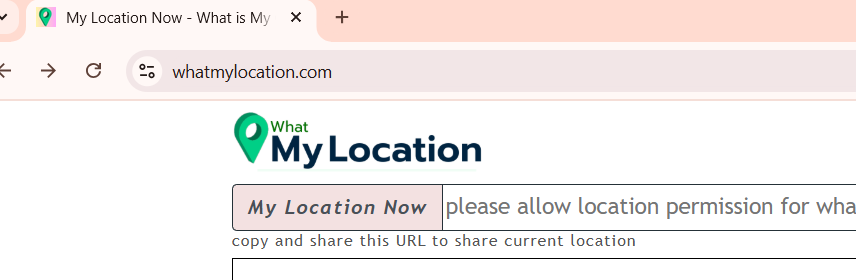

# **What is a Web Table in Selenium?**

A web table is an HTML table (table tag) on a webpage that organizes data in rows (tr tag) and columns (td tag or th tag). Selenium can interact with these tables to read, extract, and manipulate data.





```
<table>
    <thead>
        <tr>
            <th>ID</th>
            <th>Name</th>
            <th>Role</th>
            <th>Status</th>
            <th>Action</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>1</td>
            <td>John</td>
            <td>Admin</td>
            <td>Active</td>
            <td><button class="edit">Edit</button> <button class="delete">Delete</button></td>
        </tr>
        <tr>
            <td>2</td>
            <td>Jane</td>
            <td>Employee</td>
            <td>Inactive</td>
            <td><button class="edit">Edit</button> <button class="delete">Delete</button></td>
        </tr>
        <tr>
            <td>3</td>
            <td>Mark</td>
            <td>Manager</td>
            <td>Active</td>
            <td><button class="edit">Edit</button> <button class="delete">Delete</button></td>
        </tr>
    </tbody>
</table>

```



# **Types of Web Tables**

# **Static Web Table**

A static table has fixed rows and columns, meaning the data inside it does not change unless the webpage is updated manually.

The structure of the table remains the same, and Selenium can directly locate elements using XPath or CSS selectors.

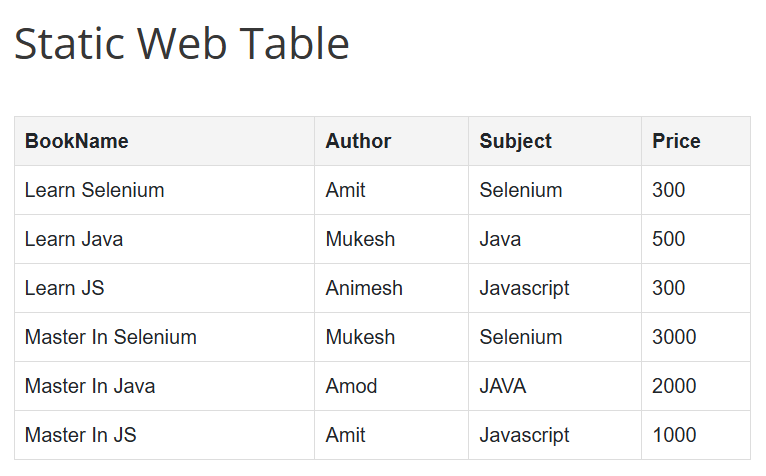



```
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

# 1) Initialize WebDriver
service = Service()  
driver = webdriver.Chrome(service=service)  

# 2) Open the website
driver.get("https://testautomationpractice.blogspot.com/")
driver.implicitly_wait(10)  # Implicit wait to allow elements to load
driver.maximize_window()  # Maximize browser window

# 3) Count the number of rows in the table
noofRows = len(driver.find_elements(By.XPATH, "//table[@name='BookTable']//tr"))

# 4) Count the number of columns in the first row (header or data)
noofCols = len(driver.find_elements(By.XPATH, "//table[@name='BookTable']//tr[1]/*"))

print("No of rows:", noofRows)
print("No of cols:", noofCols)

# 5)read the specific row and cols data
data=driver.find_element(By.XPATH, "//table[@name='BookTable']//tbody/tr[5]/td[1]")
print(data.text)

# 6)print all rows and cols data
print("All rows and cols data")
for r in range(2,noofRows+1):
    for c in range(1,noofCols+1):
        data=driver.find_element(By.XPATH, "//table[@name='BookTable']//tbody/tr["+str(r)+"]/td["+str(c)+"]")
        print(data.text, end='   ')
    print()

# 7) read the data based upon the condition(List books name who author is Mukesh)
print("Books written by Mukesh:")
for r in range(2,noofRows+1):
    author=driver.find_element(By.XPATH, "//table[@name='BookTable']//tbody/tr["+str(r)+"]/td[2]")
    if author.text=="Mukesh":
        book=driver.find_element(By.XPATH, "//table[@name='BookTable']//tbody/tr["+str(r)+"]/td[1]")
        price=driver.find_element(By.XPATH, "//table[@name='BookTable']//tbody/tr["+str(r)+"]/td[4]")
        print(book.text)
        print(price.text)
    

# Close the browser
driver.quit()

```



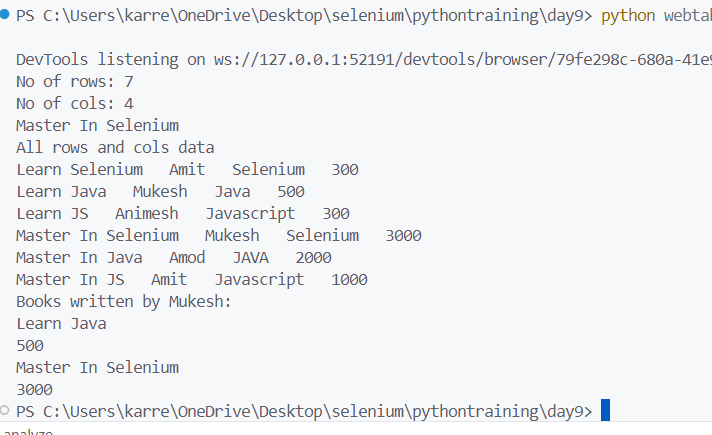

# **Dynamic Web Table**

A dynamic table updates its data automatically, often fetched from a database or API.

The number of rows and columns can change dynamically based on user actions (e.g., search, pagination, sorting).

It may require waiting for elements to load before interacting with them.



```
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

# Initialize WebDriver
driver = webdriver.Chrome()
driver.get("https://opensource-demo.orangehrmlive.com/")
driver.maximize_window()
driver.maximize_window()

# Wait for login fields and enter credentials
time.sleep(2)  # Wait for the login page to load
username = driver.find_element(By.XPATH, "//input[@name='username']")
password = driver.find_element(By.XPATH, "//input[@name='password']")

username.send_keys("Admin")
password.send_keys("admin123")

# Click the login button
driver.find_element(By.XPATH, "//button[@type='submit']").click()

# Wait for the Admin menu to be clickable
time.sleep(3)  # Wait for the page to load after login
admin_menu = driver.find_element(By.XPATH, "//span[text()='Admin']")
admin_menu.click()

# Wait for the User Management Table to Load
time.sleep(3)  # Wait for the table to load
table = driver.find_element(By.XPATH, "//div[@class='oxd-table-card']") # Assuming this is the table

# Find Rows and Columns
rows = driver.find_elements(By.XPATH, "//div[@class='oxd-table-body']/div") # Assuming this is the row
columns = driver.find_elements(By.XPATH, "//div[@role='columnheader']") # Assuming this is the column

print(f"Total Rows: {len(rows)}")
print(f"Total Columns: {len(columns)}")

# count the enabled and disabled users
enabled_users = 0
disabled_users = 0
for row in rows:
    status = row.find_element(By.XPATH, ".//div[@role='cell'][5]").text  # Assuming 5th column contains status
    if status == "Enabled":
        enabled_users += 1
    elif status == "Disabled":
        disabled_users += 1
print(f"enabled_users: {enabled_users}")
print(f"disabled_users: {disabled_users}")


# Extract and Print All Data
for row in rows:
    row_data = row.find_elements(By.XPATH, ".//div[@role='cell']")
    row_text = [col.text for col in row_data]
    print(row_text)

# Define the text you're looking for
search_text = "Admin"

# Loop through each row in the table
for row in rows:
    # Get all the cells in the current row
    col_data = row.find_elements(By.XPATH, ".//div[@role='cell']")
    
    # Check if the row has cells and if the 2nd cell (index 1) contains the search text
    if col_data and search_text in col_data[1].text:  # 2nd column is index 1
        # If found, print the entire row's data
        print(f"Found '{search_text}' in row: {[col.text for col in col_data]}")
        break  # Stop the loop after finding the first match


# Close browser
driver.quit()


```



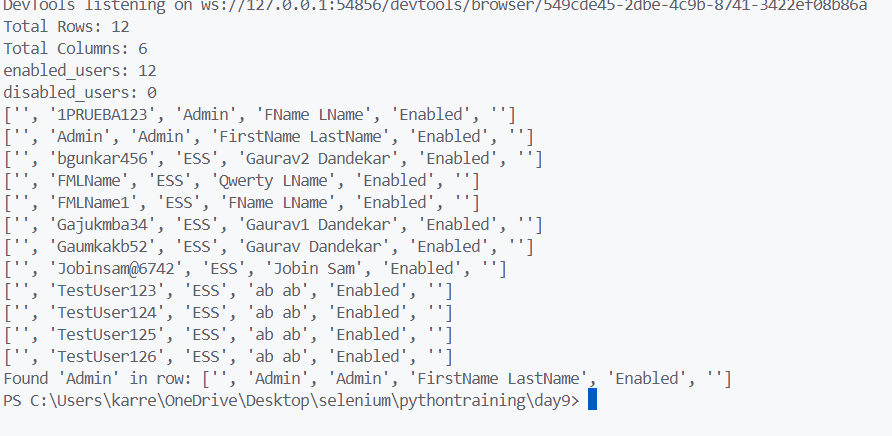